In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import keras
from matplotlib import pyplot as plt

Using TensorFlow backend.


In [5]:
# !pip install keras
# !pip install tensorflow

# Lidando com os dados

In [3]:
def transformData(dataSet):
    y = dataSet['label']
    X = dataSet.drop(columns=['label'])
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    X_train = X_train/255
    X_val = X_val/255
    return (X_train, X_val, y_train, y_val)

# Redução de Dimensionalidade e Clusterização

In [4]:
data = pd.read_csv('fashion-mnist_train.csv')

In [5]:
(X_train, X_val, y_train, y_val) = transformData(data)

In [6]:
X_train.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
48572,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
38696,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
13611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
35213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
31766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,...,0.000000,0.000000,0.003922,0.000000,0.043137,0.145098,0.023529,0.0,0.0,0.0
57477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.321569,0.113725,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
9165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.458824,0.282353,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
21399,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0
44113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.768627,0.960784,0.803922,0.000000,0.000000,0.0,0.0,0.0
55436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0


In [7]:
y_train.shape

(48000,)

In [8]:
y_val.shape

(12000,)

## Treinando

 -> sparse_categorical
 -> Sem usar dropout, overfitting muito rápido
     -> Adicionamos dropout e diminuimos as camadas 

## Tentativa 1

In [69]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history3 = model.fit(np.array(X_train),np.array(y_train),validation_data=(X_val, y_val),epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s 78us/step - loss: 0.5184 - accuracy: 0.8155 - val_loss: 0.4094 - val_accuracy: 0.8528
Epoch 2/10
48000/48000 [==============================] - 4s 75us/step - loss: 0.3861 - accuracy: 0.8597 - val_loss: 0.3569 - val_accuracy: 0.8711
Epoch 3/10
48000/48000 [==============================] - 4s 75us/step - loss: 0.3464 - accuracy: 0.8743 - val_loss: 0.3436 - val_accuracy: 0.8723
Epoch 4/10
48000/48000 [==============================] - 4s 77us/step - loss: 0.3222 - accuracy: 0.8814 - val_loss: 0.3292 - val_accuracy: 0.8784
Epoch 5/10
48000/48000 [==============================] - 4s 77us/step - loss: 0.3028 - accuracy: 0.8891 - val_loss: 0.3260 - val_accuracy: 0.8826
Epoch 6/10
48000/48000 [==============================] - 4s 77us/step - loss: 0.2896 - accuracy: 0.8930 - val_loss: 0.3272 - val_accuracy: 0.8827
Epoch 7/10
48000/48000 [==============================] - 4s 81us/st

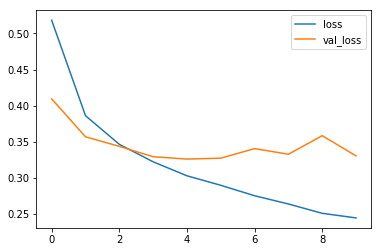

In [71]:
loss = train_history3.history['loss']
val_loss = train_history3.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

## Tentativa 2

In [43]:
initializer = keras.initializers.RandomUniform(minval=-0.05, maxval=0.05, seed=346)

In [44]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu',kernel_initializer=initializer, bias_initializer='ones'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu',kernel_initializer=initializer, bias_initializer='ones'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax',kernel_initializer=initializer, bias_initializer='ones')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [45]:
train_history2 = model.fit(np.array(X_train),np.array(y_train),validation_data=(X_val, y_val),epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 90us/step - loss: 0.6817 - accuracy: 0.7488 - val_loss: 0.4550 - val_accuracy: 0.8267
Epoch 2/20
48000/48000 [==============================] - 4s 86us/step - loss: 0.5004 - accuracy: 0.8192 - val_loss: 0.4159 - val_accuracy: 0.8506
Epoch 3/20
48000/48000 [==============================] - 4s 83us/step - loss: 0.4596 - accuracy: 0.8325 - val_loss: 0.3926 - val_accuracy: 0.8572
Epoch 4/20
48000/48000 [==============================] - 4s 83us/step - loss: 0.4370 - accuracy: 0.8414 - val_loss: 0.3729 - val_accuracy: 0.8604
Epoch 5/20
48000/48000 [==============================] - 4s 83us/step - loss: 0.4234 - accuracy: 0.8468 - val_loss: 0.3634 - val_accuracy: 0.8624
Epoch 6/20
48000/48000 [==============================] - 4s 83us/step - loss: 0.4107 - accuracy: 0.8505 - val_loss: 0.3548 - val_accuracy: 0.8713
Epoch 7/20
48000/48000 [==============================] - 4s 83us/st

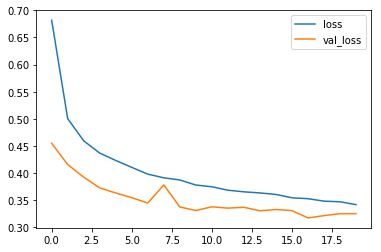

In [46]:
loss = train_history2.history['loss']
val_loss = train_history2.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

## Aplicando PCA

In [47]:
from sklearn.decomposition import PCA

### 64 componentes

In [48]:
pca = PCA(n_components=64)
pca.fit(X_train)
newX_train = pca.transform(X_train)
newX_val = pca.transform(X_val)

In [49]:
variancesPerFeature = pca.explained_variance_ratio_
variancesPerFeature

array([0.2898411 , 0.17740469, 0.06014269, 0.04988386, 0.038573  ,
       0.03455608, 0.02352776, 0.0190694 , 0.01344913, 0.0130614 ,
       0.00990559, 0.00910351, 0.00763416, 0.0065899 , 0.00610855,
       0.00590688, 0.00554203, 0.00529725, 0.00463077, 0.00455368,
       0.00431895, 0.00407812, 0.00383489, 0.00376273, 0.00364112,
       0.00350273, 0.00333314, 0.00319524, 0.00310191, 0.00296527,
       0.00276032, 0.00265654, 0.00264357, 0.00255114, 0.00249119,
       0.00239354, 0.00230545, 0.00223688, 0.00220139, 0.00210758,
       0.00201101, 0.00196957, 0.00194242, 0.00183282, 0.00175565,
       0.00171596, 0.00167254, 0.00165266, 0.00161725, 0.00156174,
       0.00154091, 0.00151085, 0.00147512, 0.00143028, 0.00137836,
       0.0013607 , 0.00130852, 0.0012875 , 0.00126629, 0.00124412,
       0.00121904, 0.00120499, 0.0011759 , 0.00114644])

In [50]:
variance = np.sum(variancesPerFeature)
variance

0.8811437434168179

In [56]:
model = keras.Sequential([
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history_pca = model.fit(np.array(newX_train),np.array(y_train),validation_data=(newX_val, y_val),epochs=300,batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/300
48000/48000 [==============================] - 0s 5us/step - loss: 2.0887 - accuracy: 0.2657 - val_loss: 1.5191 - val_accuracy: 0.5542
Epoch 2/300
48000/48000 [==============================] - 0s 3us/step - loss: 1.3484 - accuracy: 0.5741 - val_loss: 1.0247 - val_accuracy: 0.7285
Epoch 3/300
48000/48000 [==============================] - 0s 3us/step - loss: 1.0022 - accuracy: 0.6883 - val_loss: 0.7879 - val_accuracy: 0.7762
Epoch 4/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.8337 - accuracy: 0.7316 - val_loss: 0.6693 - val_accuracy: 0.7953
Epoch 5/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.7395 - accuracy: 0.7540 - val_loss: 0.6023 - val_accuracy: 0.8059
Epoch 6/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.6835 - accuracy: 0.7673 - val_loss: 0.5606 - val_accuracy: 0.8136
Epoch 7/300
48000/48000 [==============================] - 0s 3us/st

48000/48000 [==============================] - 0s 3us/step - loss: 0.4198 - accuracy: 0.8505 - val_loss: 0.3871 - val_accuracy: 0.8606
Epoch 57/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.4191 - accuracy: 0.8497 - val_loss: 0.3865 - val_accuracy: 0.8603
Epoch 58/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.4179 - accuracy: 0.8501 - val_loss: 0.3857 - val_accuracy: 0.8615
Epoch 59/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.4160 - accuracy: 0.8522 - val_loss: 0.3848 - val_accuracy: 0.8618
Epoch 60/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.4172 - accuracy: 0.8507 - val_loss: 0.3845 - val_accuracy: 0.8604
Epoch 61/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.4180 - accuracy: 0.8505 - val_loss: 0.3843 - val_accuracy: 0.8620
Epoch 62/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.4155 - accuracy: 0.8508 - val_loss: 0.3839 

48000/48000 [==============================] - 0s 3us/step - loss: 0.3922 - accuracy: 0.8587 - val_loss: 0.3701 - val_accuracy: 0.8670
Epoch 112/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3916 - accuracy: 0.8591 - val_loss: 0.3695 - val_accuracy: 0.8670
Epoch 113/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3890 - accuracy: 0.8596 - val_loss: 0.3693 - val_accuracy: 0.8678
Epoch 114/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3938 - accuracy: 0.8590 - val_loss: 0.3693 - val_accuracy: 0.8676
Epoch 115/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3936 - accuracy: 0.8579 - val_loss: 0.3702 - val_accuracy: 0.8674
Epoch 116/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3926 - accuracy: 0.8585 - val_loss: 0.3694 - val_accuracy: 0.8677
Epoch 117/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3888 - accuracy: 0.8602 - val_loss: 0

48000/48000 [==============================] - 0s 4us/step - loss: 0.3785 - accuracy: 0.8627 - val_loss: 0.3646 - val_accuracy: 0.8688
Epoch 167/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3810 - accuracy: 0.8618 - val_loss: 0.3643 - val_accuracy: 0.8688
Epoch 168/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3777 - accuracy: 0.8636 - val_loss: 0.3637 - val_accuracy: 0.8693
Epoch 169/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3794 - accuracy: 0.8629 - val_loss: 0.3629 - val_accuracy: 0.8699
Epoch 170/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3789 - accuracy: 0.8629 - val_loss: 0.3640 - val_accuracy: 0.8695
Epoch 171/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3790 - accuracy: 0.8625 - val_loss: 0.3635 - val_accuracy: 0.8697
Epoch 172/300
48000/48000 [==============================] - 0s 3us/step - loss: 0.3777 - accuracy: 0.8639 - val_loss: 0

48000/48000 [==============================] - 0s 3us/step - loss: 0.3717 - accuracy: 0.8657 - val_loss: 0.3610 - val_accuracy: 0.8692
Epoch 222/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3735 - accuracy: 0.8648 - val_loss: 0.3620 - val_accuracy: 0.8692
Epoch 223/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3707 - accuracy: 0.8655 - val_loss: 0.3614 - val_accuracy: 0.8699
Epoch 224/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3721 - accuracy: 0.8641 - val_loss: 0.3618 - val_accuracy: 0.8702
Epoch 225/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3737 - accuracy: 0.8656 - val_loss: 0.3617 - val_accuracy: 0.8694
Epoch 226/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3722 - accuracy: 0.8650 - val_loss: 0.3613 - val_accuracy: 0.8687
Epoch 227/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3700 - accuracy: 0.8662 - val_loss: 0

48000/48000 [==============================] - 0s 2us/step - loss: 0.3665 - accuracy: 0.8678 - val_loss: 0.3600 - val_accuracy: 0.8709
Epoch 277/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3675 - accuracy: 0.8675 - val_loss: 0.3606 - val_accuracy: 0.8708
Epoch 278/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3682 - accuracy: 0.8667 - val_loss: 0.3608 - val_accuracy: 0.8712
Epoch 279/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3652 - accuracy: 0.8676 - val_loss: 0.3600 - val_accuracy: 0.8702
Epoch 280/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3665 - accuracy: 0.8657 - val_loss: 0.3602 - val_accuracy: 0.8716
Epoch 281/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3674 - accuracy: 0.8668 - val_loss: 0.3602 - val_accuracy: 0.8720
Epoch 282/300
48000/48000 [==============================] - 0s 2us/step - loss: 0.3671 - accuracy: 0.8677 - val_loss: 0

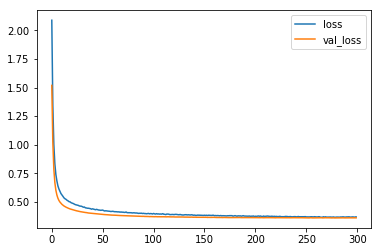

In [58]:
loss = train_history_pca.history['loss']
val_loss = train_history_pca.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

### 15 componentes

In [60]:
pca = PCA(n_components=15)
pca.fit(X_train)
newX_train = pca.transform(X_train)
newX_val = pca.transform(X_val)

In [61]:
variancesPerFeature = pca.explained_variance_ratio_
variancesPerFeature

array([0.2898411 , 0.17740469, 0.06014269, 0.04988386, 0.038573  ,
       0.03455608, 0.02352776, 0.0190694 , 0.01344913, 0.0130614 ,
       0.00990559, 0.00910351, 0.00763407, 0.00658964, 0.00610811])

In [62]:
variance = np.sum(variancesPerFeature)
variance

0.7588500258750605

In [63]:
model = keras.Sequential([
    keras.layers.Dense(12, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history_pca = model.fit(np.array(newX_train),np.array(y_train),validation_data=(newX_val, y_val),epochs=50,batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/50
48000/48000 [==============================] - 0s 5us/step - loss: 2.7152 - accuracy: 0.1249 - val_loss: 2.2038 - val_accuracy: 0.1869
Epoch 2/50
48000/48000 [==============================] - 0s 2us/step - loss: 2.1073 - accuracy: 0.2651 - val_loss: 1.7683 - val_accuracy: 0.4035
Epoch 3/50
48000/48000 [==============================] - 0s 2us/step - loss: 1.7616 - accuracy: 0.3833 - val_loss: 1.4934 - val_accuracy: 0.5233
Epoch 4/50
48000/48000 [==============================] - 0s 2us/step - loss: 1.5341 - accuracy: 0.4783 - val_loss: 1.2975 - val_accuracy: 0.5985
Epoch 5/50
48000/48000 [==============================] - 0s 2us/step - loss: 1.3699 - accuracy: 0.5384 - val_loss: 1.1545 - val_accuracy: 0.6359
Epoch 6/50
48000/48000 [==============================] - 0s 2us/step - loss: 1.2628 - accuracy: 0.5680 - val_loss: 1.0441 - val_accuracy: 0.6661
Epoch 7/50
48000/48000 [==============================] - 0s 2us/step - lo

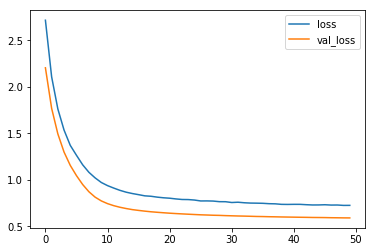

In [64]:
loss = train_history_pca.history['loss']
val_loss = train_history_pca.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

### 128 Componentes

In [65]:
pca = PCA(n_components=128)
pca.fit(X_train)
newX_train = pca.transform(X_train)
newX_val = pca.transform(X_val)

In [66]:
variancesPerFeature = pca.explained_variance_ratio_
variancesPerFeature

array([0.2898411 , 0.17740469, 0.06014269, 0.04988386, 0.038573  ,
       0.03455608, 0.02352776, 0.0190694 , 0.01344913, 0.0130614 ,
       0.00990559, 0.00910351, 0.00763416, 0.0065899 , 0.00610855,
       0.00590688, 0.00554203, 0.00529725, 0.00463077, 0.00455368,
       0.00431895, 0.00407812, 0.00383489, 0.00376273, 0.00364112,
       0.00350273, 0.00333314, 0.00319524, 0.00310191, 0.00296527,
       0.00276032, 0.00265654, 0.00264357, 0.00255114, 0.00249119,
       0.00239356, 0.00230545, 0.00223689, 0.0022014 , 0.0021076 ,
       0.00201102, 0.00196958, 0.00194251, 0.0018329 , 0.00175575,
       0.00171609, 0.00167287, 0.00165302, 0.00161781, 0.00156227,
       0.00154178, 0.00151259, 0.00147691, 0.00143158, 0.00138061,
       0.00137085, 0.00131084, 0.00129362, 0.00127233, 0.00126095,
       0.00122854, 0.00120756, 0.00118727, 0.00116214, 0.00115392,
       0.00112162, 0.00111083, 0.00109214, 0.00106647, 0.00103918,
       0.00103816, 0.00101868, 0.00097091, 0.00094978, 0.00093

In [67]:
variance = np.sum(variancesPerFeature)
variance

0.9274805690058738

In [68]:
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history_pca = model.fit(np.array(newX_train),np.array(y_train),validation_data=(newX_val, y_val),epochs=100,batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/100
48000/48000 [==============================] - 0s 9us/step - loss: 1.8223 - accuracy: 0.3970 - val_loss: 1.1585 - val_accuracy: 0.7042
Epoch 2/100
48000/48000 [==============================] - 0s 5us/step - loss: 0.9616 - accuracy: 0.7046 - val_loss: 0.6353 - val_accuracy: 0.7934
Epoch 3/100
48000/48000 [==============================] - 0s 5us/step - loss: 0.6754 - accuracy: 0.7748 - val_loss: 0.5055 - val_accuracy: 0.8232
Epoch 4/100
48000/48000 [==============================] - 0s 5us/step - loss: 0.5782 - accuracy: 0.8000 - val_loss: 0.4573 - val_accuracy: 0.8382
Epoch 5/100
48000/48000 [==============================] - 0s 5us/step - loss: 0.5323 - accuracy: 0.8153 - val_loss: 0.4326 - val_accuracy: 0.8459
Epoch 6/100
48000/48000 [==============================] - 0s 5us/step - loss: 0.4997 - accuracy: 0.8248 - val_loss: 0.4158 - val_accuracy: 0.8507
Epoch 7/100
48000/48000 [==============================] - 0s 5us/st

48000/48000 [==============================] - 0s 5us/step - loss: 0.3044 - accuracy: 0.8892 - val_loss: 0.3137 - val_accuracy: 0.8868
Epoch 57/100
48000/48000 [==============================] - 0s 4us/step - loss: 0.3030 - accuracy: 0.8897 - val_loss: 0.3131 - val_accuracy: 0.8867
Epoch 58/100
48000/48000 [==============================] - 0s 4us/step - loss: 0.3043 - accuracy: 0.8907 - val_loss: 0.3125 - val_accuracy: 0.8866
Epoch 59/100
48000/48000 [==============================] - 0s 4us/step - loss: 0.3027 - accuracy: 0.8902 - val_loss: 0.3121 - val_accuracy: 0.8860
Epoch 60/100
48000/48000 [==============================] - 0s 4us/step - loss: 0.3019 - accuracy: 0.8892 - val_loss: 0.3127 - val_accuracy: 0.8869
Epoch 61/100
48000/48000 [==============================] - 0s 4us/step - loss: 0.3011 - accuracy: 0.8917 - val_loss: 0.3119 - val_accuracy: 0.8874
Epoch 62/100
48000/48000 [==============================] - 0s 4us/step - loss: 0.2988 - accuracy: 0.8907 - val_loss: 0.3120 

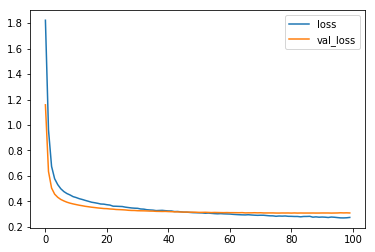

In [69]:
loss = train_history_pca.history['loss']
val_loss = train_history_pca.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

### 200 componentes

In [70]:
pca = PCA(n_components=200)
pca.fit(X_train)
newX_train = pca.transform(X_train)
newX_val = pca.transform(X_val)

In [71]:
variancesPerFeature = pca.explained_variance_ratio_
variancesPerFeature

array([2.89841096e-01, 1.77404691e-01, 6.01426915e-02, 4.98838565e-02,
       3.85730003e-02, 3.45560772e-02, 2.35277642e-02, 1.90694009e-02,
       1.34491273e-02, 1.30613965e-02, 9.90559286e-03, 9.10351081e-03,
       7.63416358e-03, 6.58989905e-03, 6.10854684e-03, 5.90687586e-03,
       5.54202974e-03, 5.29724977e-03, 4.63077083e-03, 4.55367785e-03,
       4.31895074e-03, 4.07811882e-03, 3.83488737e-03, 3.76272950e-03,
       3.64111798e-03, 3.50272738e-03, 3.33313878e-03, 3.19523949e-03,
       3.10191004e-03, 2.96527230e-03, 2.76032239e-03, 2.65653769e-03,
       2.64357276e-03, 2.55113661e-03, 2.49119531e-03, 2.39356066e-03,
       2.30545320e-03, 2.23688662e-03, 2.20140068e-03, 2.10760067e-03,
       2.01102302e-03, 1.96957714e-03, 1.94250844e-03, 1.83290301e-03,
       1.75575816e-03, 1.71609754e-03, 1.67287114e-03, 1.65302721e-03,
       1.61782250e-03, 1.56227207e-03, 1.54179392e-03, 1.51260661e-03,
       1.47692667e-03, 1.43161772e-03, 1.38066917e-03, 1.37089025e-03,
      

In [72]:
variance = np.sum(variancesPerFeature)
variance

0.9531997136548462

In [75]:
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history_pca = model.fit(np.array(newX_train),np.array(y_train),validation_data=(newX_val, y_val),epochs=60,batch_size=1000)

Train on 48000 samples, validate on 12000 samples
Epoch 1/60
48000/48000 [==============================] - 1s 11us/step - loss: 1.5294 - accuracy: 0.4872 - val_loss: 0.7975 - val_accuracy: 0.7498
Epoch 2/60
48000/48000 [==============================] - 0s 8us/step - loss: 0.8228 - accuracy: 0.7194 - val_loss: 0.5327 - val_accuracy: 0.8079
Epoch 3/60
48000/48000 [==============================] - 0s 8us/step - loss: 0.6440 - accuracy: 0.7755 - val_loss: 0.4622 - val_accuracy: 0.8322
Epoch 4/60
48000/48000 [==============================] - 0s 10us/step - loss: 0.5699 - accuracy: 0.7990 - val_loss: 0.4306 - val_accuracy: 0.8428
Epoch 5/60
48000/48000 [==============================] - 0s 10us/step - loss: 0.5291 - accuracy: 0.8135 - val_loss: 0.4136 - val_accuracy: 0.8497
Epoch 6/60
48000/48000 [==============================] - 0s 10us/step - loss: 0.4994 - accuracy: 0.8245 - val_loss: 0.3970 - val_accuracy: 0.8567
Epoch 7/60
48000/48000 [==============================] - 0s 8us/step 

48000/48000 [==============================] - 0s 8us/step - loss: 0.2866 - accuracy: 0.8961 - val_loss: 0.3023 - val_accuracy: 0.8906
Epoch 57/60
48000/48000 [==============================] - 0s 10us/step - loss: 0.2851 - accuracy: 0.8964 - val_loss: 0.3028 - val_accuracy: 0.8923
Epoch 58/60
48000/48000 [==============================] - 0s 8us/step - loss: 0.2846 - accuracy: 0.8974 - val_loss: 0.3016 - val_accuracy: 0.8926
Epoch 59/60
48000/48000 [==============================] - 0s 7us/step - loss: 0.2866 - accuracy: 0.8966 - val_loss: 0.3003 - val_accuracy: 0.8921
Epoch 60/60
48000/48000 [==============================] - 0s 8us/step - loss: 0.2821 - accuracy: 0.8973 - val_loss: 0.3004 - val_accuracy: 0.8917


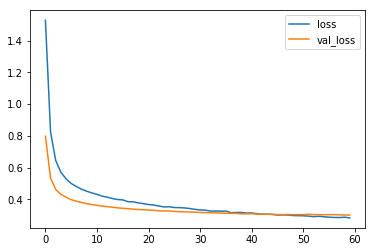

In [76]:
loss = train_history_pca.history['loss']
val_loss = train_history_pca.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

## Aplicando AutoEncoder

## Autoencoder - Tentativa 1

### Autoencoder 1

In [117]:
initializer = keras.initializers.RandomUniform(minval=-0.5,maxval=0.05,seed=567)

In [118]:
autoencoder_1 = keras.Sequential([
    keras.layers.Dense(392, activation='relu', kernel_initializer=initializer, bias_initializer='ones'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu', kernel_initializer=initializer, bias_initializer='ones'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(392, activation='relu', kernel_initializer=initializer, bias_initializer='ones'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(784, activation='sigmoid', kernel_initializer=initializer, bias_initializer='ones')
])

In [119]:
autoencoder_1.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [120]:
train_history_autoencoder_1 = autoencoder_1.fit(np.array(X_train),np.array(X_train),validation_data=(X_val, X_val),epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 15s 309us/step - loss: 0.2135 - accuracy: 0.0015 - val_loss: 0.1367 - val_accuracy: 0.0012
Epoch 2/20
48000/48000 [==============================] - 14s 289us/step - loss: 0.1116 - accuracy: 0.0016 - val_loss: 0.0969 - val_accuracy: 0.0012
Epoch 3/20
48000/48000 [==============================] - 14s 297us/step - loss: 0.0928 - accuracy: 0.0016 - val_loss: 0.0893 - val_accuracy: 0.0012
Epoch 4/20
48000/48000 [==============================] - 14s 293us/step - loss: 0.0888 - accuracy: 0.0016 - val_loss: 0.0873 - val_accuracy: 0.0012
Epoch 5/20
48000/48000 [==============================] - 13s 280us/step - loss: 0.0876 - accuracy: 0.0016 - val_loss: 0.0867 - val_accuracy: 0.0012
Epoch 6/20
48000/48000 [==============================] - 14s 295us/step - loss: 0.0873 - accuracy: 0.0016 - val_loss: 0.0864 - val_accuracy: 0.0012
Epoch 7/20
48000/48000 [==============================] 

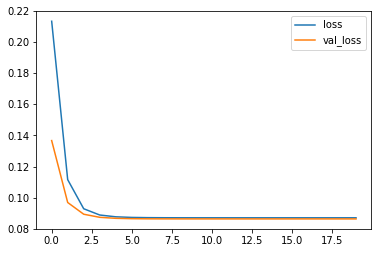

In [121]:
loss = train_history_autoencoder_1.history['loss']
val_loss = train_history_autoencoder_1.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

### Treinando com autoencoder 1

In [141]:
from keras.models import Model
from keras.models import Model
from keras import regularizers
from keras.layers import Input,Dense

In [125]:
autoencoder_1.layers[0].trainable = False
autoencoder_1.layers[1].trainable = False
autoencoder_1.layers[2].trainable = False

model = keras.Sequential([
    autoencoder_1.layers[0],
    autoencoder_1.layers[1],
    autoencoder_1.layers[2],
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
    ])

In [126]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history_autoencoder_1_in_data_set = model.fit(np.array(X_train),np.array(y_train),validation_data=(X_val, y_val),epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 4s 88us/step - loss: 2.3057 - accuracy: 0.0991 - val_loss: 2.3027 - val_accuracy: 0.0951
Epoch 2/20
48000/48000 [==============================] - 4s 84us/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3029 - val_accuracy: 0.1020
Epoch 3/20
48000/48000 [==============================] - 4s 85us/step - loss: 2.3028 - accuracy: 0.0999 - val_loss: 2.3029 - val_accuracy: 0.0988
Epoch 4/20
48000/48000 [==============================] - 4s 88us/step - loss: 2.3027 - accuracy: 0.0989 - val_loss: 2.3030 - val_accuracy: 0.0957
Epoch 5/20
48000/48000 [==============================] - 4s 91us/step - loss: 2.3027 - accuracy: 0.1009 - val_loss: 2.3031 - val_accuracy: 0.0951
Epoch 6/20
48000/48000 [==============================] - 4s 88us/step - loss: 2.3027 - accuracy: 0.0980 - val_loss: 2.3029 - val_accuracy: 0.0957
Epoch 7/20
48000/48000 [==============================] - 4s 90us/st

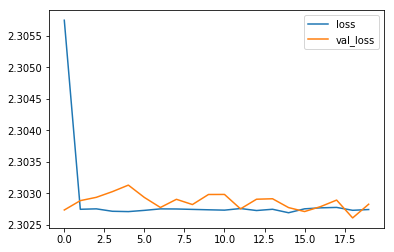

In [127]:
loss = train_history_autoencoder_1_in_data_set.history['loss']
val_loss = train_history_autoencoder_1_in_data_set.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

## Autoencoder - Tentativa 2

In [142]:
initializer = keras.initializers.RandomUniform(minval=-0.5,maxval=0.05,seed=567)

In [169]:
input_img = Input(shape=(784,))

encoded = Dense(200, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder_2 = Model(input_img, decoded)

In [145]:
autoencoder_2.compile(optimizer='adam', loss='binary_crossentropy')

In [147]:
train_history_autoencoder_2 = autoencoder_2.fit(np.array(X_train),np.array(X_train),validation_data=(X_val, X_val),epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 183us/step - loss: 0.3450 - val_loss: 0.3446
Epoch 2/10
48000/48000 [==============================] - 9s 189us/step - loss: 0.3444 - val_loss: 0.3449
Epoch 3/10
48000/48000 [==============================] - 9s 189us/step - loss: 0.3439 - val_loss: 0.3437
Epoch 4/10
48000/48000 [==============================] - 9s 191us/step - loss: 0.3434 - val_loss: 0.3430
Epoch 5/10
48000/48000 [==============================] - 10s 209us/step - loss: 0.3430 - val_loss: 0.3425
Epoch 6/10
48000/48000 [==============================] - 10s 202us/step - loss: 0.3427 - val_loss: 0.3426
Epoch 7/10
48000/48000 [==============================] - 9s 195us/step - loss: 0.3425 - val_loss: 0.3429
Epoch 8/10
48000/48000 [==============================] - 10s 205us/step - loss: 0.3422 - val_loss: 0.3442
Epoch 9/10
48000/48000 [==============================] - 10s 198us/step - loss: 0.3421 - val_loss:

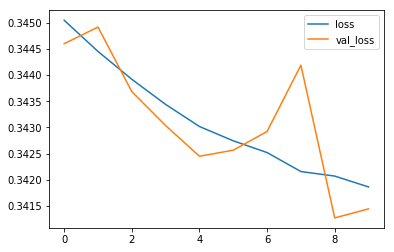

In [148]:
loss = train_history_autoencoder_2.history['loss']
val_loss = train_history_autoencoder_2.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()

### Treinando com autoencoder 2

In [162]:
from keras.models import Model
from keras.layers import Dropout

In [175]:
# input_img = Input(shape=(784,))

layersModel = Dense(128, activation='relu')(encoded)
layersModel = Dropout(0.4)(layersModel)
layersModel = Dense(64, activation='relu')(layersModel)
layersModel = Dropout(0.2)(layersModel)
layersModel = Dense(10, activation='softmax')(layersModel)

newModel = Model(inputs=encoded,outputs=layersModel)


print(newModel.summary())

/anaconda3/lib/python3.7/site-packages/keras/engine/network.py:190: UserWarning: Model inputs must come from `keras.layers.Input` (thus holding past layer metadata), they cannot be the output of a previous non-Input layer. Here, a tensor specified as input to your model was not an Input tensor, it was generated by layer dense_113.
Note that input tensors are instantiated via `tensor = keras.layers.Input(shape)`.
The tensor that caused the issue was: dense_113/Relu:0
  str(x.name))


ValueError: Graph disconnected: cannot obtain value for tensor Tensor("input_6:0", shape=(None, 784), dtype=float32) at layer "input_6". The following previous layers were accessed without issue: []

In [161]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
train_history_autoencoder_2_in_data_set = model.fit(np.array(X_train),np.array(y_train),validation_data=(X_val, y_val),epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
37760/48000 [======================>.......] - ETA: 1s - loss: 2.3028 - accuracy: 0.10

KeyboardInterrupt: 

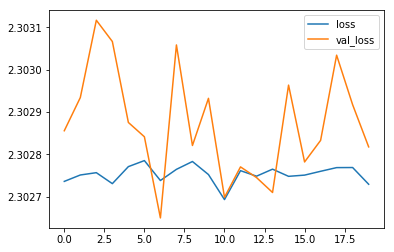

In [136]:
loss = train_history_autoencoder_2_in_data_set.history['loss']
val_loss = train_history_autoencoder_2_in_data_set.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.legend(['loss', 'val_loss'])
plt.show()